In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

## Window functions are like aggregation functions
You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

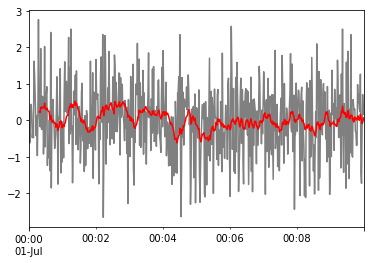

In [10]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df['A'].rolling(window = 20)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df['A'].plot(color = 'gray')
r.mean().plot(color = 'red')

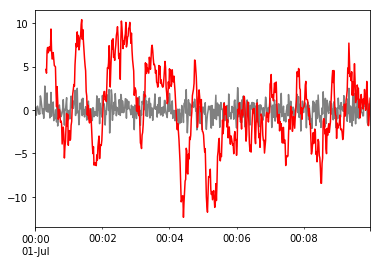

In [12]:
df['A'].plot(color = 'gray')
r.sum().plot(color = 'red')

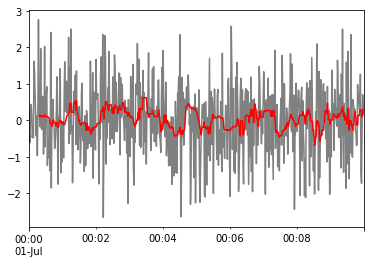

In [14]:
df['A'].plot(color = 'gray')
r.median().plot(color = 'red')

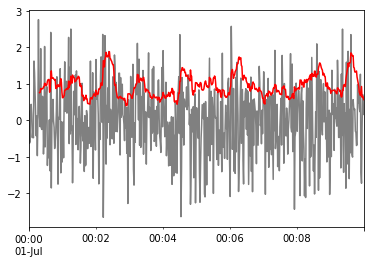

In [15]:
df['A'].plot(color = 'gray')
r.var().plot(color = 'red')

In [22]:
# EWMA
# Why use EWMA?

# focus on specific portions of the window, when the recent past is more important than the less-recent past

In [17]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\srsch\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,-0.216197,-0.685449,0.311551
2016-07-01 00:00:02,-0.353131,-1.012545,-0.025642
2016-07-01 00:00:03,-0.137984,-0.646116,0.150252
2016-07-01 00:00:04,0.009213,-0.160006,0.339227
2016-07-01 00:00:05,0.041578,-0.390036,0.173432
2016-07-01 00:00:06,-0.064776,-0.059484,0.029067
2016-07-01 00:00:07,-0.107127,0.470380,-0.024774
2016-07-01 00:00:08,-0.173680,0.263830,-0.309987
2016-07-01 00:00:09,0.130536,0.071795,-0.131480


In [18]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [19]:
df.head()

,A,B,C,D
2016-06-06,1.336696,-0.741082,1.079095,-1.758477
2016-06-07,-0.083100,0.752624,-0.283137,1.634265
2016-06-08,-0.352010,-1.894772,-1.714758,-0.434158
2016-06-09,0.930548,-0.196192,0.720800,-0.963747
2016-06-10,-0.678685,0.358195,0.190328,0.234615


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026483EBFB00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000026484010518>], dtype=object)

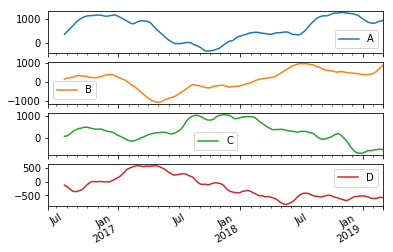

In [20]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [21]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.930665,1.241265,0.819520,0.819101


In [16]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C
2016-07-01 00:00:01,-0.186850,-0.573212,0.232320
2016-07-01 00:00:02,-0.317162,-0.898537,-0.038069
2016-07-01 00:00:03,-0.148091,-0.623769,0.110614
2016-07-01 00:00:04,-0.031353,-0.249391,0.265818


In [ ]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

# high volatility; past remains important, even beyond typical lagging

In [ ]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [ ]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting